# Tests CH4 : recup long d'onde, spectre d'absportion, bandes precises, determiner absorbance puis concentration chimique ch4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy import units
from astropy.io import fits
import glob
import os
from datetime import datetime
import time
import math
%matplotlib inline

In [ ]:
def files():
    path = 'C:/Users/raynaudy/Documents/Manip/\Test_lambdametre\with_ch4/20230214'
    files = os.listdir(path)
    fits_files = []
    specific = '337pas'
    for name in files:
        if specific in name and '.fits' in name:
            fits_files.append(name)
    print(fits_files)
files()

## Recup data + graph

In [7]:
def get_files():
    molecule ='with_CH4'
    #path = 'C:/Users/raynaudy/Documents/Manip/Test_lambdametre/with_ch4/20230214'
    #.format(molecule)
    path = 'C:/Users/raynaudy/Documents/Manip/CH4/long_onde_1642_to_1654/with_CH4/20230207'
    #path1 = 'C:/Users/raynaudy/Documents/Manip/Tests_pwrmtr/test_synchro_mesures/20230214'
    files = os.listdir(path)
    fits_files = []
    specific = '_50pas'
    for name in files:
        if specific in name and '.fits' in name:
            fits_files.append(path+'/'+name)
        else :
            print('NO FILES FOUND')
    return(fits_files)
    

def header(f):
    l_onde, l_int, l_pwrmtr, l_temp, l_date = [],[],[],[],[]
    for i in range(1,len(f)):
        l_onde.append(f[i].header['LAMBDA'])
        l_int.append(f[i].header['HIERARCH INTENSITE'])
        l_pwrmtr.append(f[i].header['INTENSITE_POWER_METER'])
        l_temp.append(f[i].header['TEMPERATURE'])
        l_date.append(f[i].header['EXTNAME'])
    return(l_onde, l_int, l_pwrmtr, l_temp, l_date)
    
def graph_data(wvl,pwrmtr,io,cam):
        fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8, 8))#,figsize=(8, 6)
        fig.subplots_adjust(hspace=0.3)
        #for i incam = 1/cam   
        ax1.plot(np.asarray(wvl, float),cam,color='red',label='mean') 
        ax1.set_xlabel('$\lambda$ [nm]')
        ax1.set_ylabel('Intensité')  
        ax2.plot(np.asarray(wvl, float),pwrmtr,label='mean') 
        ax2.set_xlabel('$\lambda$ [nm]')
        ax2.set_ylabel('Current Power Meter [nA]')
        ax3.plot(np.asarray(wvl, float),io,label='mean') 
        ax3.set_xlabel('$\lambda$ [nm]')
        ax3.set_ylabel('Current Source [mA]')

def get_data():
    #global l_onde, l_int, l_pwrmtr, l_temp, l_date, medhdul
    l_onde, l_int, l_pwrmtr, l_temp, l_date = [],[],[],[],[]
    #x =without_CH4
    fits_files = get_files()
    print(fits_files)
    for file in fits_files:
        hdul = fits.open(file)
        l_onde, l_int, l_pwrmtr, l_temp, l_date = header(hdul)
        medhdul = []
        for i in range(1,len(hdul)):
            meddata = []
            data = hdul[i].data
            for j in range(0, len(data)):
                meddata.append(np.median(hdul[i].data[j]))
            medhdul.append(np.median(meddata))

        
        
    #return(l_onde, l_int, l_pwrmtr, l_temp, l_date, medhdul)
    graph_data(l_onde,l_pwrmtr,l_int,medhdul)



NO FILES FOUND
NO FILES FOUND
NO FILES FOUND
NO FILES FOUND
NO FILES FOUND
['C:/Users/raynaudy/Documents/Manip/CH4/long_onde_1642_to_1654/with_CH4/20230207/20230207_120054_1650_to_1651_50pas_00000.fits']


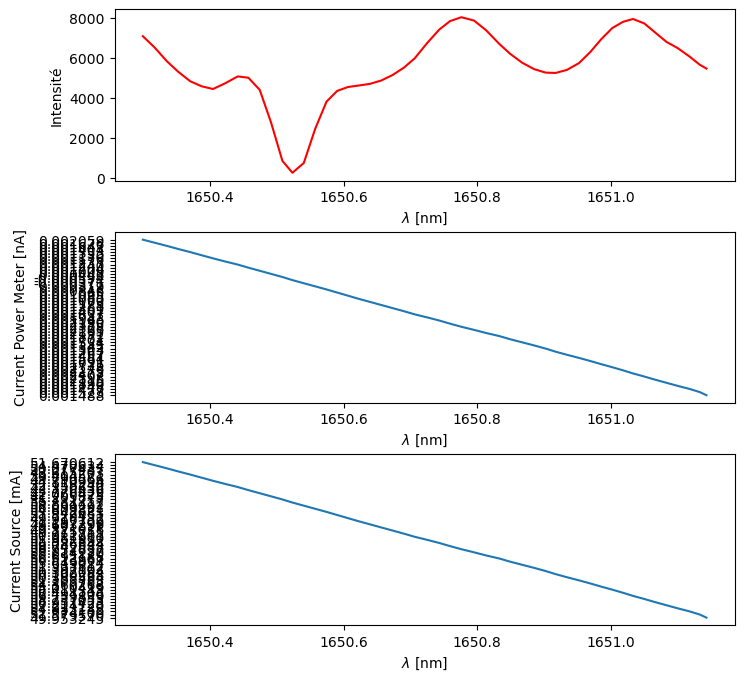

In [8]:
get_data()

In [ ]:
l_pwrmtr

## Recup longueur d'onde bande d'absorption
    

In [ ]:
#prend les mins sous une certaine intensite recu
#ca fonctionne mais logique bancale, pas belle, a modif
def get_min():
    min_io = 1500
    #l_onde, l_int, l_pwrmtr, l_temp, l_date, medhdul,wvl_abs,int_abs = [], [], [] ,[],[],[],[],[]
    #l_onde, l_int, l_pwrmtr, l_temp, l_date, medhdul = get_data()
    wvl_abs,int_abs = [], []
    for i in range(0,len(medhdul)):
        if medhdul[i]<min_io:
            wvl_abs.append(l_onde[i])
            int_abs.append(medhdul[i])
    print('wvl : ', wvl_abs,'\n intensite : ' , int_abs)
    return(wvl_abs,int_abs)
get_min()

def get_abs():
    wvl_abs, int_abs = get_min()
    wvlmin, intmin, wvlabs, intabs = [],[],[],[]
    i=0
    #for i in range(0,len(wvl_abs)-1):
    while i< len(wvl_abs):
        while float(wvl_abs[i])<float(wvl_abs[i+1])+0.5:
            wvlmin.append(wvl_abs[i])
            intmin.append(int_abs[i])
            i+=1
            #print('test 2   ', i)
        wvlmin.append(wvl_abs[i])
        intmin.append(int_abs[i])
        y = intmin.index(np.min(intmin))
        wvlabs.append(wvlmin[y])
        intabs.append(intmin[y])
        print('test 3   ', i)
        i+=1
        
        print('wvl abs = ', wvlabs, '\nint abs = ', intabs)
    
#get_abs()
        

In [ ]:
v1,v2,v3,v4,v5 = 6046.93, 6057.03, 6066.98, 6077, 6086.79

wl1, wl2, wl3, wl4, wl5 = 1/v1*10000000, 1/v2*10000000, 1/v3*10000000, 1/v4*10000000, 1/v5*10000000

print('\n', wl1,'\n', wl2,'\n', wl3,'\n', wl4,'\n', wl5)

## Calcul absorbance => Concentration 

In [ ]:
def graph_absorb(wvl,T ,A ,cam):
        fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8, 8))#,figsize=(8, 6)
        fig.subplots_adjust(hspace=0.3)
        #for i incam = 1/cam   
        ax1.plot(np.asarray(wvl, float),cam,color='red',label='mean') 
        ax1.set_xlabel('$\lambda$ [nm]')
        ax1.set_ylabel('Intensité [nA]')  
        ax2.plot(np.asarray(wvl, float),T,label='mean') 
        ax2.set_xlabel('$\lambda$ [nm]')
        ax2.set_ylabel('Transmittance')
        ax3.plot(np.asarray(wvl, float),A,label='mean') 
        ax3.set_xlabel('$\lambda$ [nm]')
        ax3.set_ylabel('Absorbance ')


def get_absorbance():
    global transmittance, absorbance
    absorbance, transmittance, ttt = [],[], []
    for i in range(0,len(medhdul)):
        try:
            a = math.log10(float(l_int[i])/float(l_pwrmtr[i])*10**6)
            t = 10**-(float(a))
            tt = float(l_pwrmtr[i]) / (float(l_int[i])*10**6)
        except:
            a = math.log10(float(l_int[i])/abs(float(l_pwrmtr[i])*10**6))
            t = 10**-(float(a))
            tt = float(l_pwrmtr[i]) / abs((float(l_int[i])*10**6))
            absorbance.append(a)
            transmittance.append(t)
            ttt.append(tt)
        else:
            absorbance.append(a)
            transmittance.append(t)
            ttt.append(tt)
            #print('/n ', a, '   ', l_int[i], '    ', l_pwrmtr[i])
    #print(len(absorbance), '   ', len(transmittance), '    ', len(ttt))
    #print(transmittance == ttt)
    #return(absorbance, transmittance)
    #absorbance = [np.median(absorbance) if x == 0 else x for x in absorbance]
    transmittance = [np.median(transmittance) if x == 0 else x for x in transmittance]
    graph_absorb(l_onde,transmittance,absorbance,medhdul)


In [ ]:
get_absorbance()

In [ ]:
def get_concentration():
    

NO MATCH
FILE FOUND 
NO MATCH
NO MATCH
NO MATCH
NO MATCH
NO MATCH
['C:/Users/raynaudy/Documents/Manip/CH4/long_onde_1642_to_1654/with_CH4/20230215/20230215_151139_1650-5_to_1651-4_pas_50_current_343_00000.fits']


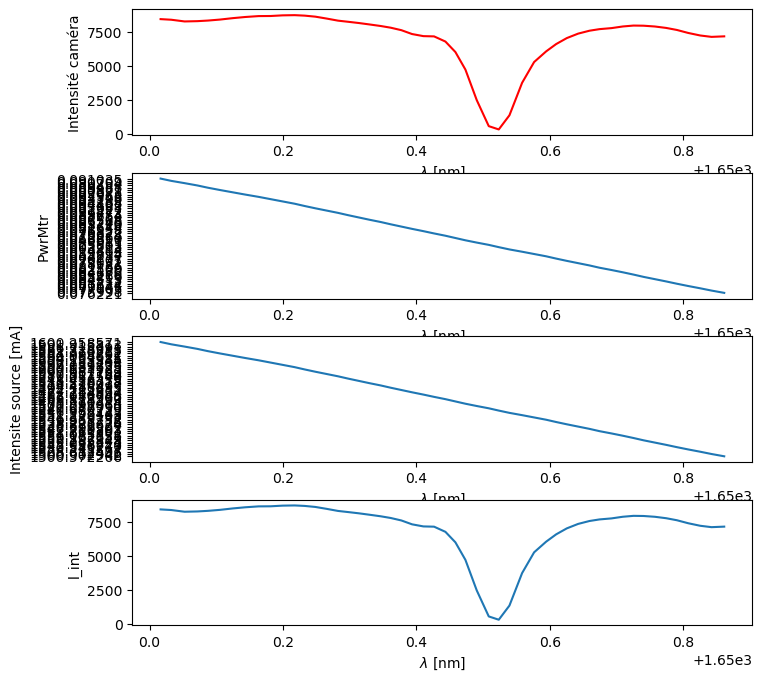

In [4]:
def get_files():

    path = 'C:/Users/raynaudy/Documents/Manip/CH4/long_onde_1642_to_1654/with_CH4/20230215'
    #path = 'C:/Users/raynaudy/Documents/Manip/tests_synchro_pwrmtr/obstruction_laser/20230215'
    files = os.listdir(path)
    fits_files = []
    specific = 'pas_50_c'
    for name in files:
        if specific in name and '.fits' in name:
            fits_files.append(path+'/'+name)
            print('FILE FOUND ')
        else :
            print('NO MATCH')
    return(fits_files)

def graph_data(wvl,pwrmtr,io,cam):
        fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(8, 8))#,figsize=(8, 6)
        fig.subplots_adjust(hspace=0.3)
        #for i incam = 1/cam   
        ax1.plot(np.asarray(wvl, float),cam,color='red',label='mean') 
        ax1.set_xlabel('$\lambda$ [nm]')
        ax1.set_ylabel('Intensité')  
        ax2.plot(np.asarray(wvl, float),pwrmtr,label='mean') 
        ax2.set_xlabel('$\lambda$ [nm]')
        ax2.set_ylabel('Current Power Meter [nA]')
        ax3.plot(np.asarray(wvl, float),io,label='mean') 
        ax3.set_xlabel('$\lambda$ [nm]')
        ax3.set_ylabel('Current Source [mA]')

def header(f):
    l_onde, l_int, l_pwrmtr, l_temp, l_date = [],[],[],[],[]
    for i in range(1,len(f)):
        l_onde.append(f[i].header['LAMBDA'])
        l_int.append(f[i].header['HIERARCH INTENSITE'])
        l_pwrmtr.append(f[i].header['INTENSITE_POWER_METER'])
        l_temp.append(f[i].header['TEMPERATURE'])
        l_date.append(f[i].header['EXTNAME'])
    return(l_onde, l_int, l_pwrmtr, l_temp, l_date)
        
        
def get_data_both():
    #global l_onde, l_int, l_pwrmtr, l_temp, l_date, medhdul
    l_onde, l_int, l_pwrmtr, l_temp, l_date= [],[],[],[],[]

    fits_files = get_files()
    print(fits_files)
    for file in fits_files:
        hdul = fits.open(file)
        l_onde, l_int, l_pwrmtr, l_temp, l_date = header(hdul)
        medhdul = []
        for i in range(1,len(hdul)):
            meddata = []
            data = hdul[i].data
            for j in range(0, len(data)):
                meddata.append(np.median(hdul[i].data[j]))
            medhdul.append(np.median(meddata))

        
        
    #return(l_onde, l_int, l_pwrmtr, l_temp, l_date, medhdul)
    #graph_data(l_onde,l_pwrmtr,l_int,medhdul)
    
    #print(l_pwrmtr, '\n')
    #print(l_onde, '\n')
    #print(medhdul)
    
    a = np.linspace(0,151, num=len(medhdul))
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(8, 8))#,figsize=(8, 6)
    fig.subplots_adjust(hspace=0.3)

    ax1.plot(np.asarray(l_onde, float),medhdul,color='red',label='mean') 
    ax1.set_xlabel('$\lambda$ [nm]')
    ax1.set_ylabel('Intensité caméra') 
    ax2.plot(np.asarray(l_onde, float),l_pwrmtr,label='mean') 
    ax2.set_xlabel('$\lambda$ [nm]')
    ax2.set_ylabel('PwrMtr')
    ax3.plot(np.asarray(l_onde, float),l_int,label='mean') 
    ax3.set_xlabel('$\lambda$ [nm]')
    ax3.set_ylabel('Intensite source [mA]')
    ax4.plot(np.asarray(l_onde, float),medhdul,label='mean') 
    ax4.set_xlabel('$\lambda$ [nm]')
    ax4.set_ylabel('l_int')
    
    
    
get_data_both()

In [ ]:
print(len(medhdul))
a = np.linspace(0,51, num=51)
len(a)

In [ ]:
a = np.linspace(0,51, num=51)
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8, 8))#,figsize=(8, 6)
fig.subplots_adjust(hspace=0.3)

ax1.plot(a,medhdul,color='red',label='mean') 
ax1.set_xlabel('$\lambda$ [nm]')
ax1.set_ylabel('Intensité [nA]') 
ax2.plot(a,l_pwrmtr,label='mean') 
ax2.set_xlabel('$\lambda$ [nm]')
ax2.set_ylabel('Transmittance')